# Conda tutorial

In [13]:
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import utility
import models

In [23]:
from utility import *

In [24]:
import os
import torch
import numpy as np
from torch import nn
from torchvision import datasets, transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [25]:
PATH_SPEC = '../low_spec/ff1010bird/'
PATH_LABEL = '../labels/ff1010bird.csv.csv'

In [26]:
data = Mydataset(PATH_LABEL, PATH_SPEC)
train_set, test_set = train_test_split(data)

In [27]:
batch_size = 64
train_dataloader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_set, batch_size=batch_size, shuffle=True)

In [28]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
# img = train_features[0].squeeze()
label = train_labels[0]

print(f"Label: {label}")

Feature batch shape: torch.Size([64, 50, 80])
Labels batch shape: torch.Size([64])
Label: 0


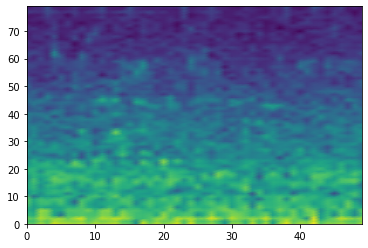

In [29]:
plt.pcolormesh(train_features[60].T, shading='gouraud')

# Train

In [30]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [31]:
model = models.Vggish()
loss_fn = nn.BCELoss()

In [32]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 2
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


loss: 1.212066  [    0/ 5767]
loss: 0.430298  [  640/ 5767]
loss: 0.536409  [ 1280/ 5767]
loss: 0.535455  [ 1920/ 5767]
loss: 0.555743  [ 2560/ 5767]
loss: 0.573946  [ 3200/ 5767]
loss: 0.445625  [ 3840/ 5767]
loss: 0.573240  [ 4480/ 5767]
loss: 0.588762  [ 5120/ 5767]
loss: 0.499539  [  630/ 5767]
Test Error: 
 Accuracy: 6.3%, Avg loss: 0.513375 

Epoch 2
-------------------------------
loss: 0.417644  [    0/ 5767]
loss: 0.408070  [  640/ 5767]
loss: 0.480999  [ 1280/ 5767]
loss: 0.486908  [ 1920/ 5767]
loss: 0.400856  [ 2560/ 5767]
loss: 0.544104  [ 3200/ 5767]
loss: 0.352144  [ 3840/ 5767]
loss: 0.438443  [ 4480/ 5767]
loss: 0.428510  [ 5120/ 5767]
loss: 0.475461  [  630/ 5767]
Test Error: 
 Accuracy: 4.5%, Avg loss: 0.503038 

Done!


In [ ]:
test_loop(test_dataloader, model, loss_fn)

c:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Test Error: 
 Accuracy: 5.1%, Avg loss: 0.484048 

